Mobile 고객 이탈 분석

![](https://d18lkz4dllo6v2.cloudfront.net/cumulus_uploads/entry/23964/mobile%20phones.png)

## 0.환경설정

### 1) 라이브러리 로딩

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.graphics.mosaicplot import mosaic
from scipy import stats as spst
import statsmodels.api as sm

### 2) 데이터 로딩

In [3]:
# mobile data
data_path = "https://raw.githubusercontent.com/DA4BAM/dataset/master/mobile_NA2.csv"
data = pd.read_csv(data_path)
data.drop(['id', 'REPORTED_USAGE_LEVEL','OVER_15MINS_CALLS_PER_MONTH'], axis = 1, inplace = True)
data.head()

,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,CONSIDERING_CHANGE_OF_PLAN,CHURN
0,1,47711,183,17,730589.0,192,5,unsat,considering,0
1,0,74132,191,43,535092.0,349,2,unsat,no,1
2,1,150419,0,14,204004.0,682,6,unsat,considering,0
3,0,159567,0,58,281969.0,634,1,very_unsat,never_thought,0
4,1,23392,0,0,216707.0,233,15,unsat,no,1


|변수 명|내용|구분|
|	----	|	----	|	----	|
|	COLLEGE	|	대학졸업 여부(1,0)	|		|
|	INCOME	|	연 수입액(달러)	|		|
|	OVERAGE	|	월 초과사용 시간(%)	|		|
|	LEFTOVER	|	월 사용 잔여시간(%)	|		|
|	HOUSE	|	집 가격(달러)	|		|
|	HANDSET_PRICE	|	핸드폰 가격(달러)	|		|
|	AVERAGE_CALL_DURATION	|	평균 통화시간(분)	|		|
|	REPORTED_SATISFACTION	|	만족도 설문('very_unsat', 'unsat', 'avg', 'sat', 'very_sat' )	|		|
|	CONSIDERING_CHANGE_OF_PLAN	|	변경 계획 설문('never_thought', 'no', 'perhaps', 'considering',   'actively_looking_into_it')	|		|
|	**CHURN**	|	이탈여부(1 : 이탈, 0 : 잔류)	|	Label	|


----

## 1.가설수립

* 가설1 : 만족도(REPORTED_SATISFACTION)에 따라 이탈여부에 차이가 있을 것이다.

* 가설2 : 변경계획(CONSIDERING_CHANGE_OF_PLAN)에 따라 이탈 여부에 차이가 있을 것이다.

* 가설3 : 연 수입액(INCOME)에 따라 이탈 여부에 차이가 있을 것이다.

* 가설4 : 월 사용 잔여시간(LEFTOVER)에 따라 이탈 여부에 차이가 있을 것이다.

* 가설5 : 핸드폰 가격(HANDSET_PRICE)에 따라 이탈 여부에 차이가 있을 것이다.

* 가설6 : 월 초과사용(OVERAGE) 시간에 따라 이탈 여부에 차이가 있을 것이다.

----

## 2.단변량 분석

① 변수의 비즈니스 의미  

② 숫자? 범주?  

③ 전처리 사항
   - NaN 존재 여부 및 조치 방안  
   - 가변수화 대상여부  
   
④ 기초통계량

⑤ 분포  

⑥ 위 정보로부터 파악한 내용(비즈니스!) 정리  

⑦ 추가 분석해볼 사항 도출

### 1) REPORTED_SATISFACTION

REPORTED_SATISFACTION 
변수의 비즈니스 의미
* 통신사 서비스에 대해 얼마나 만족하는지에 대한 평가

숫자 ? 범주 ?
>숫자형 변수

전처리 사항


In [20]:
data.dropna(subset=['REPORTED_SATISFACTION'], axis=0, inplace=True)

In [22]:
data.isna().sum()

COLLEGE                         0
INCOME                          0
OVERAGE                         0
LEFTOVER                        0
HOUSE                         215
HANDSET_PRICE                   0
AVERAGE_CALL_DURATION           0
REPORTED_SATISFACTION           0
CONSIDERING_CHANGE_OF_PLAN      0
CHURN                           0
dtype: int64

In [21]:
data['REPORTED_SATISFACTION'].value_counts() / len(data['REPORTED_SATISFACTION'])

very_unsat    0.393720
very_sat      0.253981
unsat         0.199866
avg           0.100546
sat           0.051887
Name: REPORTED_SATISFACTION, dtype: float64

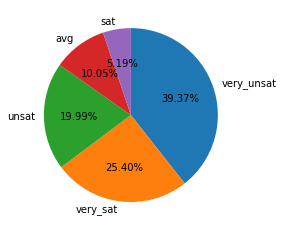

In [18]:
cnt = data['REPORTED_SATISFACTION'].value_counts()
plt.pie(cnt.values, labels = cnt.index, autopct = '%.2f%%', 
        startangle=90, counterclock=False)
plt.show()

서비스에 대해 불만족하는 이용자들이 많다. 매우 불만족, 불만족의 합이 60퍼센트 수준이라면, 급히 문제점을 찾아야한다.
* 통화품질
* 가격
* 고객관리(서비스 응대) 등

추가적으로 확인해봐야 할 사항?

> 

### 2) CONSIDERING_CHANGE_OF_PLAN

CONSIDERING_CHANGE_OF_PLAN 변수의 비즈니스 의미

향후 통신서비스사를 바꿀 계획이 어느정도있는가

숫자? 범주?
* 범주

In [25]:
#결측치 확인
data.isna().sum()

COLLEGE                         0
INCOME                          0
OVERAGE                         0
LEFTOVER                        0
HOUSE                         215
HANDSET_PRICE                   0
AVERAGE_CALL_DURATION           0
REPORTED_SATISFACTION           0
CONSIDERING_CHANGE_OF_PLAN      0
CHURN                           0
dtype: int64

> 결측치 확인되지 않음

In [27]:
data['CONSIDERING_CHANGE_OF_PLAN'].value_counts() / len(data['CONSIDERING_CHANGE_OF_PLAN'])

considering                 0.396504
actively_looking_into_it    0.247523
no                          0.202594
never_thought               0.100212
perhaps                     0.053168
Name: CONSIDERING_CHANGE_OF_PLAN, dtype: float64

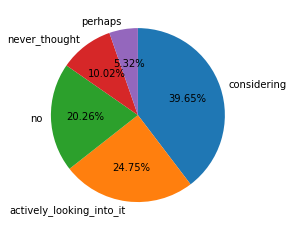

In [28]:
cnt = data['CONSIDERING_CHANGE_OF_PLAN'].value_counts()
plt.pie(cnt.values, labels = cnt.index, autopct = '%.2f%%', 
        startangle=90, counterclock=False)
plt.show()

고객 만족도에 이어서 향후 변경계획까지 상위 부정적인 의견의 합이 60퍼센트가 넘는다. 분명히 서비스에 문제가 있는 것이다.
* 서비스 불만족(정책)이라면 초과 통화 시간에 따라 과금이 있는건지?
* 고객 만족도와 변경 계획이 있는 사용자가 비슷한 범주에 속하는지?

### 3) INCOME

INCOME 변수의 비즈니스 의미

서비스 이용자의 월 수입

숫자형 변수

In [30]:
data['INCOME'].isna().sum()

0

기초통계량 검사

In [32]:
data['INCOME'].describe()

count     17962.000000
mean      80318.592195
std       41698.185540
min       20007.000000
25%       42172.000000
50%       75510.500000
75%      116082.750000
max      159983.000000
Name: INCOME, dtype: float64

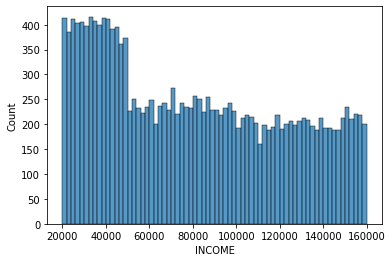

In [50]:
sns.histplot(data = data, x='INCOME', bins = 70)
plt.show()

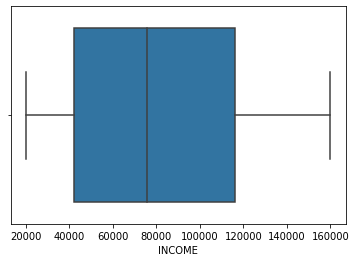

In [40]:
sns.boxplot(data = data, x='INCOME')
plt.show()

In [51]:
len(data.loc[data['INCOME'].between(20000,50000)])/len(data)

0.3333704487250863

>이상치는 보이지 않는다. 소득이 5만 달러 미만인 사용자들의 비율이 전체의 30퍼센트를 차지한다.
60퍼센트의 사용자가 서비스에 불만족한데 소득과 관련이 있을까?
> * 30퍼센트의 사용자가 60퍼센트의 불만족 사용자 안에서 어느정도의 비율을 차지할지 분석

### 4) LEFTOVER

LEFTOVER 변수의 비즈니스 의미

요금제에서 월 사용 잔여시간

In [55]:
data['LEFTOVER'].isna().sum()

0

In [56]:
data['LEFTOVER'].describe()

count    17962.000000
mean        23.980626
std         26.853695
min          0.000000
25%          0.000000
50%         14.000000
75%         42.000000
max         89.000000
Name: LEFTOVER, dtype: float64

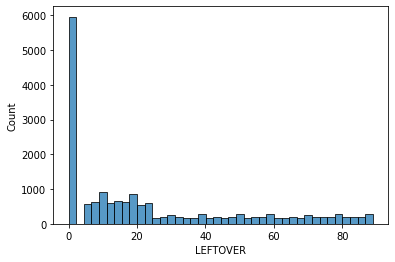

In [58]:
sns.histplot(data = data, x='LEFTOVER', bins = 40)
plt.show()

In [63]:
len(data.loc[data['LEFTOVER']==0]) / len(data['LEFTOVER'])

0.33170025609620307

통화 잔여시간이 0인 사용자가 전체의 33퍼센트이다. 
* 통화를 자주 하는 사람은 아마도 대학을 졸업한 사회인일 것이다. 
* AVERAGE_CALL_DURATION과 연관 지어서 요금제 서비스의 가성비,다양화의 관점에서 보아야할 것 같다.
* 혹은 무제한 통화사용자의 경우이거나?

### 5) HANDSET_PRICE

HANDSET_PRICE 변수의 비즈니스 의미

휴대폰 단말기 가격

In [67]:
data['HANDSET_PRICE'].isna().sum()

0

In [70]:
data['HANDSET_PRICE'].describe()

count    17962.000000
mean       390.031845
std        214.164114
min        130.000000
25%        219.000000
50%        326.000000
75%        535.750000
max        899.000000
Name: HANDSET_PRICE, dtype: float64

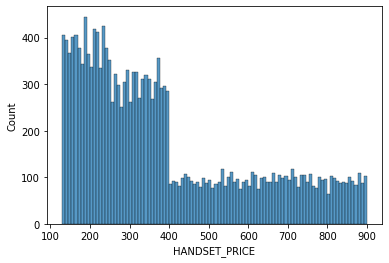

In [73]:
sns.histplot(data = data, x='HANDSET_PRICE', bins = 100)
plt.show()

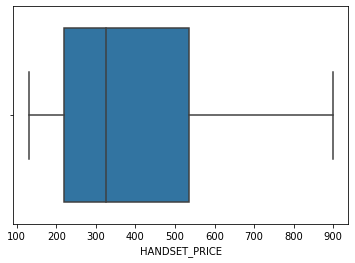

In [72]:
sns.boxplot(data = data, x='HANDSET_PRICE')
plt.show()

사용자가 사용하는 단말기 가격분포가 가성비, 중, 나머지로 뚜렷히 나눌 수 있다.
* 저가형 휴대폰을 쓰는 사람의 통화 잔여시간, 서비스 만족도, 변경희망들을 함께 분석해봐야겠다.
* 통신사에서 저렴한 요금제, 저가형 모델들 사이(400달러 미만)에 프로모션이 있어 다수의 사람이 분포하는지?

### 6) OVERAGE

OVERAGE
:
요금제 월 초과 사용 시간

In [74]:
data['OVERAGE'].isna().sum()

0

In [80]:
data['OVERAGE'].describe()

count    17962.000000
mean        86.019374
std         85.966253
min          0.000000
25%          0.000000
50%         59.000000
75%        179.000000
max        335.000000
Name: OVERAGE, dtype: float64

In [79]:
#결측치 처리
data[data['OVERAGE']< 0] = 0

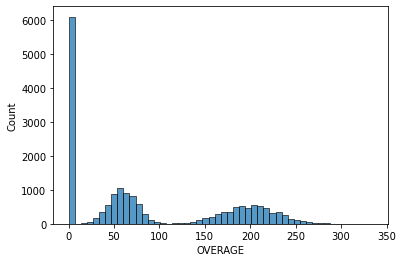

In [82]:
sns.histplot(data = data, x='OVERAGE', bins = 50)
plt.show()

In [84]:
len(data.loc[data['OVERAGE']==0]) / len(data['OVERAGE'])

0.3397728538024719

잔여 통화시간이 0인 사용자와 0인 비율이 비슷하다. 잔여 통화시간이 0인 사용자와 초과시간이 0인 사용자가 같을 확률을 봐야겠다.

In [92]:
leng = data.loc[(data['OVERAGE']==0)&(data['LEFTOVER']==0)]
print(len(data.loc[data['OVERAGE']==0]))
print(len(data.loc[data['LEFTOVER']==0]))
print(len(leng))

6103
5958
2028


두 사용자가 같지 않다. 그렇다면?
* 통화가 무제한이라 초과,잔여가 0인 것 같지 않다.

### 7) CHURN(target)

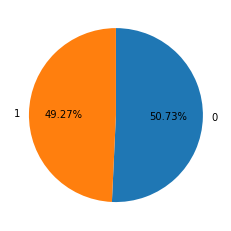

In [95]:
cnt = data['CHURN'].value_counts()

plt.pie(cnt.values, labels = cnt.index, autopct = '%.2f%%', 
        startangle=90, counterclock=False)
plt.show()

반반 비율로 결과가 나왔다. 
이탈가능성이 점차 올라갈 듯 해 보인다.

## 3.이변량 분석 
* 자료의 종류에 맞게 X --> Y 에 대해서 그래프(시각화)와 가설검정(수치화)를 수행하고 결과를 평가합니다.
* 가설검정시 다음의 항목을 참조하여 수행합니다.
    * 유의수준 : 5%
    * 숫자 --> 숫자 : 상관분석
    * 범주 --> 범주 : 카이제곱검정
    * 범주 --> 숫자 : t검정, 분산분석
    * 숫자 --> 범주 : 로지스틱 회귀모형을 통해, 회귀계수의 P.value로 검정을 수행합니다.


In [97]:
target = 'CHURN'

### (1) 범주형 Feature --> CHURN
* 모든 범주형 Feature에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.  
    ① 교차표(pd.crosstab())  
    ② 시각화( Stacked Bar, Mosaic)  
    ③ 가설검정(카이제곱검정)
* 각 feature 별로 관계의 정도를 3가지로 정리해봅시다. 

숫자형 최소 3개이상, 범주형 최소 2개 이상씩, 전체 6개의 변수를 도출, 가설을 수립하시오.

가설1 : 만족도(REPORTED_SATISFACTION)에 따라 이탈여부에 차이가 있을 것이다.

가설2 : 변경계획(CONSIDERING_CHANGE_OF_PLAN)에 따라 이탈 여부에 차이가 있을 것이다.

가설3 : 연 수입액(INCOME)에 따라 이탈 여부에 차이가 있을 것이다.

가설4 : 월 사용 잔여시간(LEFTOVER)에 따라 이탈 여부에 차이가 있을 것이다.

가설5 : 핸드폰 가격(HANDSET_PRICE)에 따라 이탈 여부에 차이가 있을 것이다.

가설6 : 월 초과사용(OVERAGE) 시간에 따라 이탈 여부에 차이가 있을 것이다.


#### 1) feature --> CHURN

In [116]:
var = 'REPORTED_SATISFACTION'

In [117]:
pd.crosstab(data[var],data[target])

CHURN,0,1
REPORTED_SATISFACTION,,
avg,952,854
sat,492,440
unsat,1792,1798
very_sat,2334,2228
very_unsat,3543,3529


<AxesSubplot:xlabel='REPORTED_SATISFACTION'>

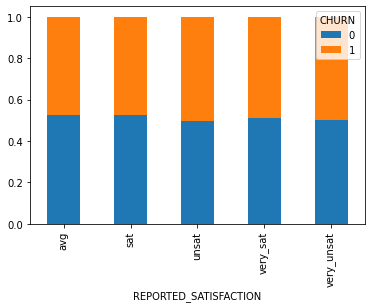

In [121]:
temp = pd.crosstab(data[var],data[target],normalize = 'index')
temp.plot.bar(stacked = True)

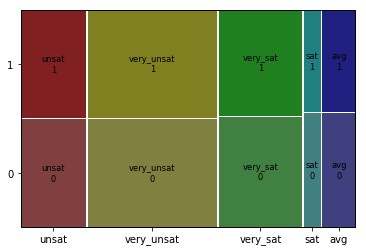

In [122]:
mosaic(data,[var, target])
# plt.axhline(1-data['Attrition'].mean(), color ='r')
plt.show()

In [123]:
# 먼저 집계
table = pd.crosstab(data[var], data[target])

# 카이제곱검정
result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('자유도', result[2])
print('기대빈도\n',result[3])

카이제곱통계량 6.841100957205645
p-value 0.14452738878905058
자유도 4
기대빈도
 [[ 916.27201871  889.72798129]
 [ 472.84912593  459.15087407]
 [1821.38236277 1768.61763723]
 [2314.5254426  2247.4745574 ]
 [3587.97104999 3484.02895001]]


만족도에 따라 결과가 달라질 것이라 예상했지만 실제로는 그 수치가 크게 의미 있지 않는다.

#### 2) feature --> CHURN

In [136]:
var = 'CONSIDERING_CHANGE_OF_PLAN'
print("target : ",target)

target :  CHURN


In [127]:
pd.crosstab(data[var],data[target])

CHURN,0,1
CONSIDERING_CHANGE_OF_PLAN,,
actively_looking_into_it,2278,2175
considering,3648,3493
never_thought,926,878
no,1823,1821
perhaps,456,502


<AxesSubplot:xlabel='CONSIDERING_CHANGE_OF_PLAN'>

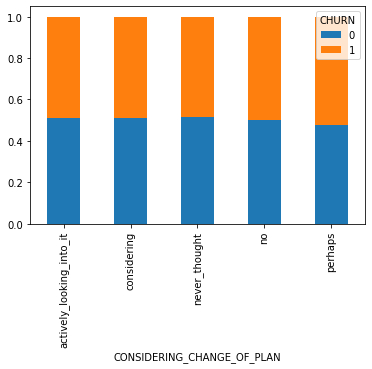

In [128]:
temp = pd.crosstab(data[var],data[target],normalize = 'index')
temp.plot.bar(stacked = True)

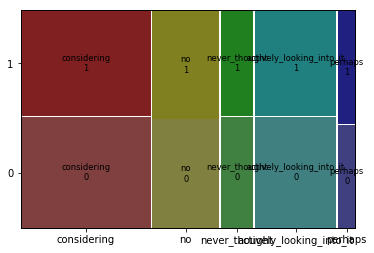

In [130]:
mosaic(data,[var, target])
plt.show()

In [129]:
# 먼저 집계
table = pd.crosstab(data[var], data[target])

# 카이제곱검정
result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('자유도', result[2])
print('기대빈도\n',result[3])

카이제곱통계량 5.421434419620688
p-value 0.24672225866799702
자유도 4
기대빈도
 [[2258.90794444 2194.09205556]
 [3622.47061111 3518.52938889]
 [ 915.12911111  888.87088889]
 [1848.52022222 1795.47977778]
 [ 485.97211111  472.02788889]]


만족도와, 변경예정인 사용자가 실제로는 이탈과 영향이 적었다. 왜일까?
* 실제로 변경하게 된 이유는 서비스 품질이나 만족도에 관련이 없고 다른 요인과 밀접한 관련이 있는 것 같다.
* 타 통신사의 프로모션?

### (2) 숫자형 Feature --> CHURN

* 숫자형 Feature에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.  
    ① 그래프 : histogram, densityplot   
    ② 수치화 : 로지스틱회귀

#### 3) feature --> CHURN

In [144]:
var = 'INCOME'

In [140]:
data[var].isna().sum()

0

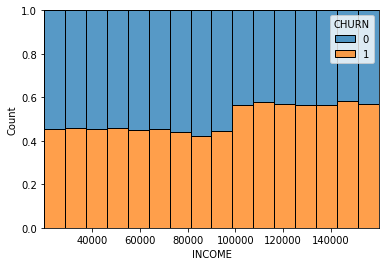

In [145]:
sns.histplot(x=var, data = data, bins = 16
             , hue =target, multiple = 'fill')
# plt.axhline(titanic[var].mean(), color = 'r')
plt.show()

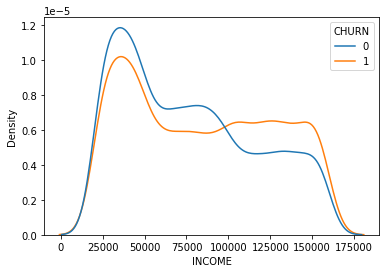

In [149]:
sns.kdeplot(x=var, data = data, hue =target, common_norm = False)
plt.show()

In [150]:
# 로지스틱 모형을 만들고 통계량을 구해 봅시다.
model = sm.Logit(data[target], data[var])
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.692683
         Iterations 2
INCOME    0.000044
dtype: float64


월 수입 5만달러 이상부터 10만달러 사이에서 이탈이 적다가 10만에서 이탈이 많다.
* 5만달러 이상의 사용자에서 이탈률이 두드러지는 이유?
* 소득이 높은 사람의 경우 업무에서 통화나, 휴대폰을 사용하는 일이 많은 것 같다.
* 통화 품질이나, 요금제에 불만이 있거나, 혹은 직접적으로 본인이 직접 휴대폰을 사용하지 않고 메신저를 이용하거나 대리업무를 맡기는 직책인가?
* 아마 사업가들이 많을텐데 사업가나 고위직은 연락이 중요한데, 품질에 영향을 많이 받은 듯 하다.

#### 4) feature --> CHURN

### 변수 : LEFTOVER

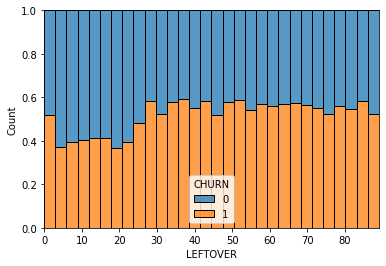

In [158]:
sns.histplot(x='LEFTOVER', data = data, bins = 30
             , hue =target, multiple = 'fill')
# plt.axhline(titanic[var].mean(), color = 'r')
plt.show()

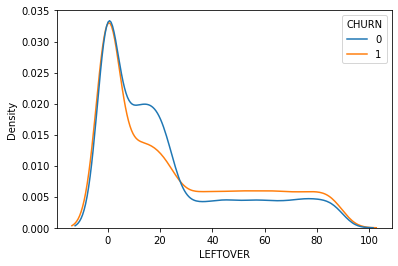

In [153]:
sns.kdeplot(x='LEFTOVER', data = data, hue =target, common_norm = False)
plt.show()

In [156]:
# 로지스틱 모형을 만들고 통계량을 구해 봅시다.
model = sm.Logit(data[target], data['LEFTOVER'])
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.692532
         Iterations 3
LEFTOVER    0.000003
dtype: float64


통화 잔여량이 20분이 넘는 사용자 구간에서 이탈률이 뚜렷하다
* 국내, 해외 조사 결과 통화 및 문자는 무제한으로 보이는데 통화 잔여량이 많다는 것은 옛날 데이터이거나, 지금이지만
* 선불 요금제를 사용하는 것 같다. 요금제 프로모션을 확인 해봐야겠다.

#### 3) feature --> CHURN


### 변수 : HANDSET_PRICE

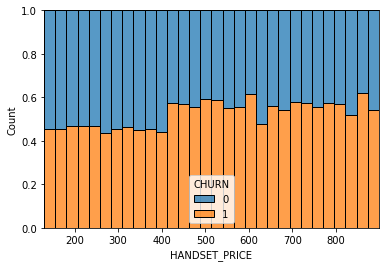

In [159]:
sns.histplot(x='HANDSET_PRICE', data = data, bins = 30
             , hue =target, multiple = 'fill')
# plt.axhline(titanic[var].mean(), color = 'r')
plt.show()

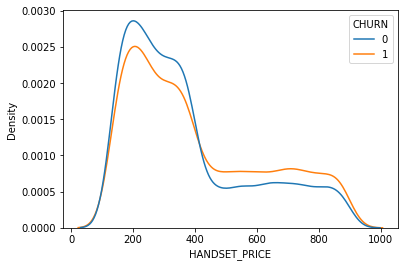

In [166]:
sns.kdeplot(x='HANDSET_PRICE', data = data, hue =target, common_norm = False)
plt.show()

In [167]:
# 로지스틱 모형을 만들고 통계량을 구해 봅시다.
model = sm.Logit(data[target], data['HANDSET_PRICE'])
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.692730
         Iterations 3
HANDSET_PRICE    0.000107
dtype: float64


* 두 구간을 나누어 확인 (400달러미만,400달러이상)해봐야겠다.

In [200]:
bins = [0,400,1000]

data['hand_price'] = pd.cut(data['HANDSET_PRICE'], bins=bins, labels=['under400','over400'])

# 범위 확인
data.groupby('hand_price', as_index = False)['HANDSET_PRICE'].agg(['min', 'max'])

,min,max
hand_price,,
under400,130,400
over400,401,899


<AxesSubplot:xlabel='hand_price'>

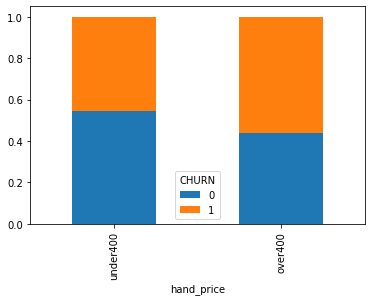

In [201]:
table = pd.crosstab(data['hand_price'], data[target], normalize = 'index')

table.plot.bar(stacked = True)
# plt.axhline(1-data['tagtr'].mean(), color = 'r')

In [202]:
# 카이제곱검정
result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('자유도', result[2])
print('기대빈도\n',result[3])

카이제곱통계량 0.0
p-value 1.0
자유도 1
기대빈도
 [[0.48995059 0.51004941]
 [0.48995059 0.51004941]]


#### 4) feature --> CHURN


### 변수 : OVERAGE

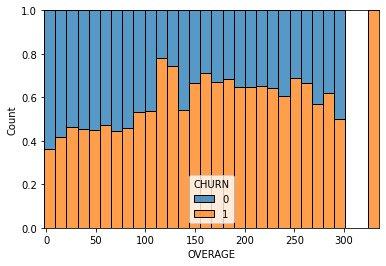

In [162]:
sns.histplot(x='OVERAGE', data = data, bins = 30
             , hue =target, multiple = 'fill')
# plt.axhline(titanic[var].mean(), color = 'r')
plt.show()

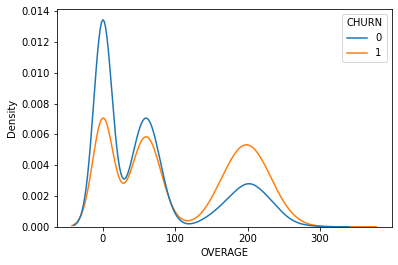

In [164]:
sns.kdeplot(x='OVERAGE', data = data, hue =target, common_norm = False)
plt.show()

In [165]:
# 로지스틱 모형을 만들고 통계량을 구해 봅시다.
model = sm.Logit(data[target], data['OVERAGE'])
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.680553
         Iterations 4
OVERAGE    3.521095e-97
dtype: float64


> 이탈은 초과시간 100이상부터 급증해서 잠시 내려왔다가 다시 150에서 급증해 이탈률이 유지된다.
> * 초과시간 100이상이 되면 어느 순간 요금제에 과금이 부스팅 되거나 혹은 100분 이상의 경우 소비자의 니즈를 만족할 요금제가 마련되어 있지 않은 것 같기도 하다.

## 4.관계 정리

### 1) 강한관계의 변수

OVERAGE,

LEFTOVER,

INCOME

### 2) 약한관계의 변수

HANDSET_PRICE

### 3) 관계 없음

REPORTED_SATISFACTION,

CONSIDERING_CHANGE_OF_PLAN

## 5.추가 분석

<AxesSubplot:xlabel='LEFTOVER', ylabel='HANDSET_PRICE'>

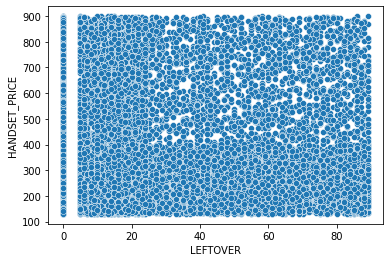

In [172]:
sns.scatterplot(x ='LEFTOVER', y ='HANDSET_PRICE',data = data)

통화 잔여 시간과 단말가격간의 관계를 보기 위해서 분석 해보았다.

<AxesSubplot:xlabel='hand_price'>

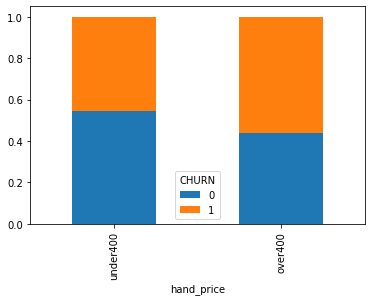

In [198]:
table2 = pd.crosstab(temp['hand_price'], temp[target], normalize = 'index')

table2.plot.bar(stacked = True)
# plt.axhline(1-data['tagtr'].mean(), color = 'r')

관점을 고객 니즈에 맞는 휴대폰 요금제와 혹은 휴대폰 단말 프로모션에서 비추었을 때 단말기 가격이 분명히 나뉘는 구간을 나누어 보았다.

In [211]:
# bins = [0,1,100]
# data['left_level'] = pd.cut(data['LEFTOVER'], bins=bins, labels=['under20','over100'])
data['left_level'] = np.where(data['LEFTOVER']==0,'zero','over_zero')
# 범위 확인
data.groupby('left_level', as_index = False)['LEFTOVER'].head()

0     17
1     43
2     14
3     58
4      0
5     43
6      0
12     0
13     0
16     0
Name: LEFTOVER, dtype: int64

<AxesSubplot:xlabel='left_level'>

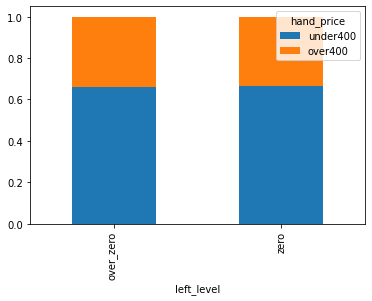

In [208]:
table2 = pd.crosstab(data['left_level'], data['hand_price'], normalize = 'index')

table2.plot.bar(stacked = True)
# plt.axhline(1-data['tagtr'].mean(), color = 'r')

In [209]:
# 카이제곱검정
result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('자유도', result[2])
print('기대빈도\n',result[3])

카이제곱통계량 0.0
p-value 1.0
자유도 1
기대빈도
 [[0.48995059 0.51004941]
 [0.48995059 0.51004941]]


단말가격과 통화잔여량 사이에는 연관이 없는 것 같다. 고객의 니즈관점에서 더 살펴봐야겠다.

In [4]:
# bins = [0,1,100]
# data['left_level'] = pd.cut(data['LEFTOVER'], bins=bins, labels=['under20','over100'])
left_range = data.copy()
left_range['left_range'] = np.where(left_range['LEFTOVER']==25,'under25','other')
# 범위 확인
left_range.groupby('left_range', as_index = False)['LEFTOVER'].head()

0       17
1       43
2       14
3       58
4        0
153     25
602     25
928     25
1058    25
1077    25
Name: LEFTOVER, dtype: int64

<AxesSubplot:xlabel='left_range'>

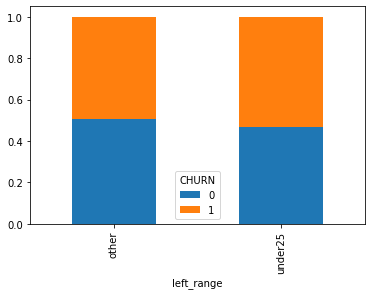

In [6]:
table3 = pd.crosstab(left_range['left_range'], left_range['CHURN'], normalize = 'index')

table3.plot.bar(stacked = True)
# plt.axhline(1-data['tagtr'].mean(), color = 'r')

# 분석 결론

데이터를 분석하다보니 통신 회사의 고객 이탈 중점이 서비스 중 통화의 비중이 높았다.
고객 만족도, 변경 계획 조사는 통계량에 우려적으로 나타난 결과와는 달랐다.
통화 잔여시간, 통화 초과시간, 연간 수입 특징이 이탈률과 밀접해 이들에 방향을 정하고 분석 한 결과, 서비스 이탈 포인트가 보였다.

## 비즈니스 관점

 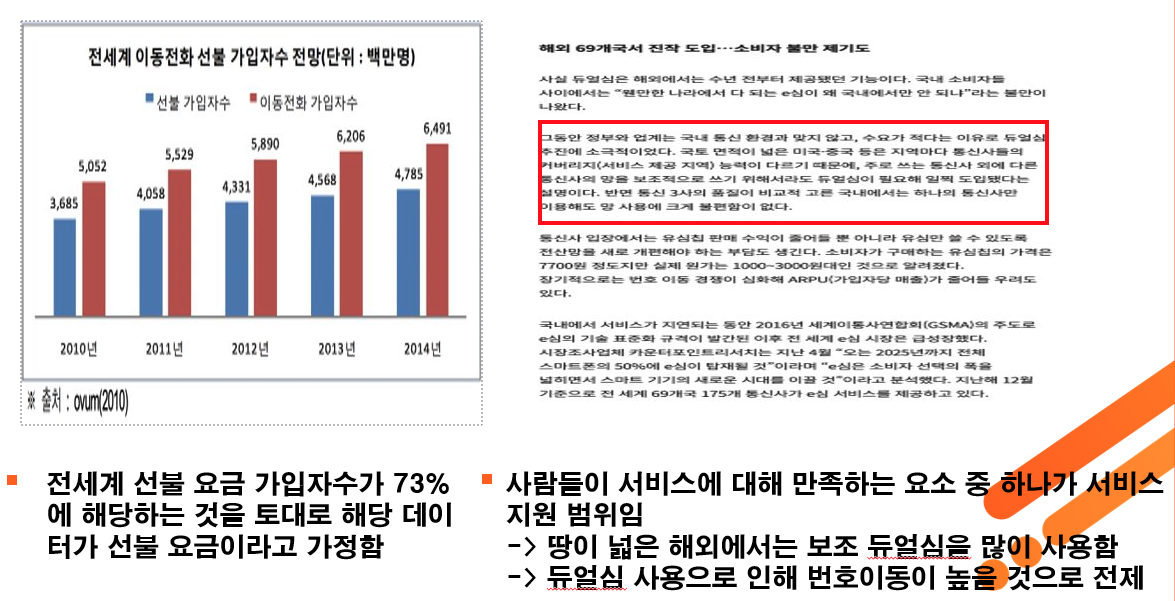

## 문제 1 : 고객 만족도, 변경 계획 조사
* ### 설문조사 내용에 대한 신뢰성이 의심된다.

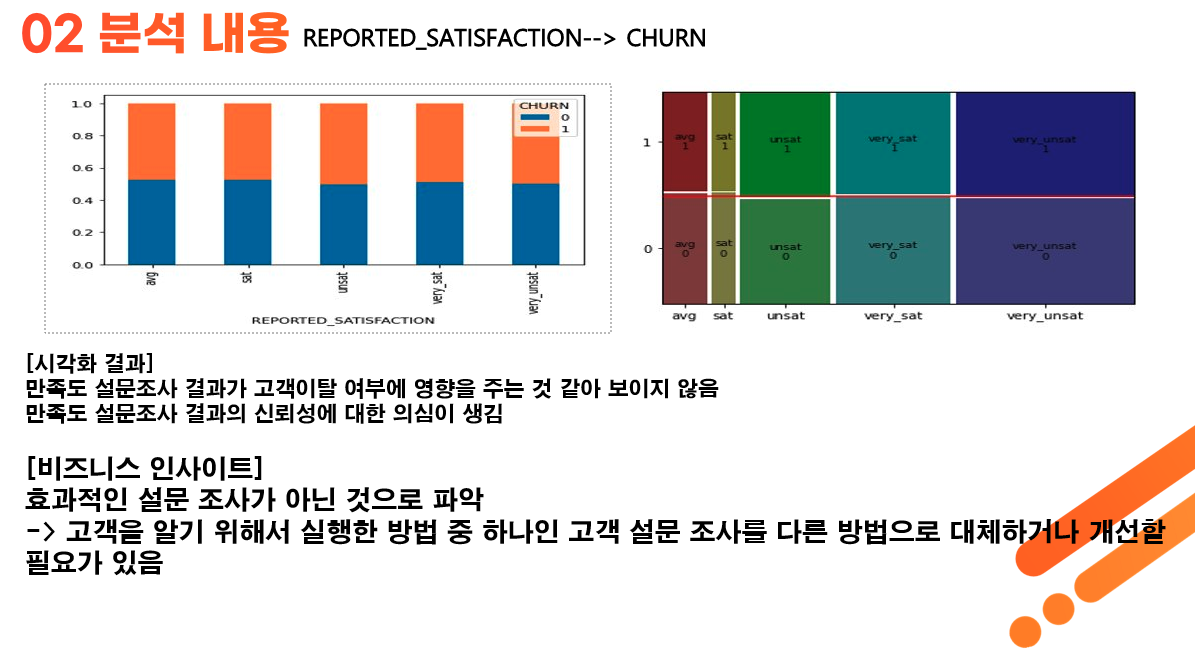

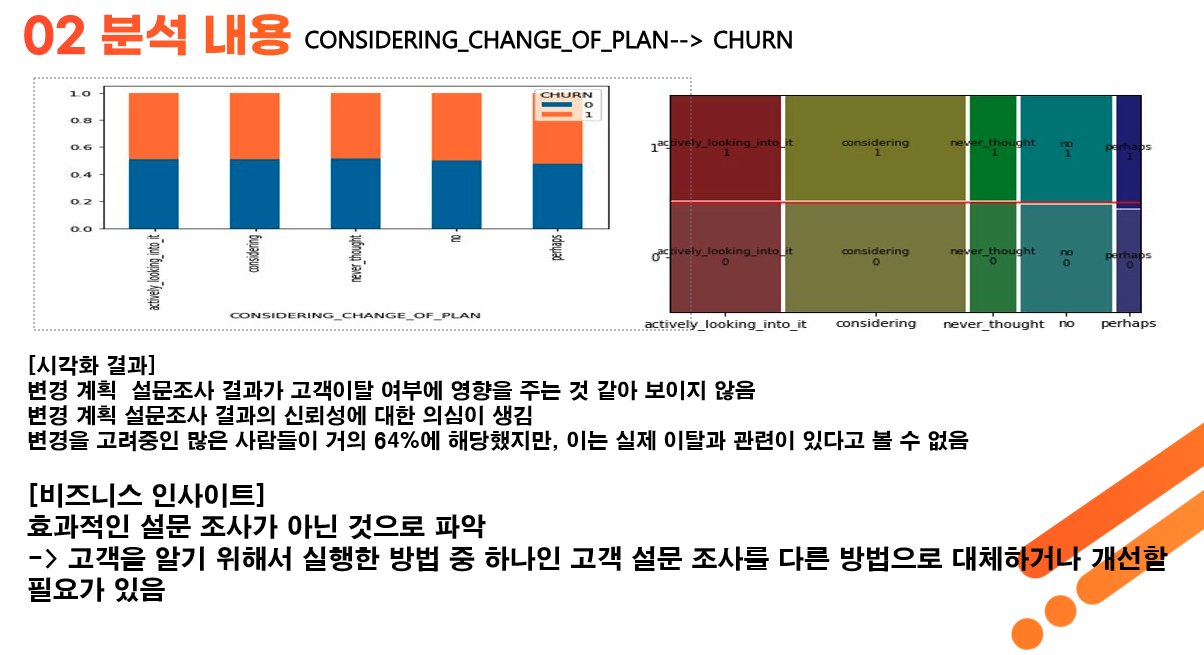

## 해결 방안
* 1. 설문 조사에 대한 질문 개선
    * 고객 이동에 실질적인 영향을 주는 통화 품질, 통화시간을 중점으로 질문
* 2. 설문 조사를 진행하는 대상 축소
    * 데이터 분석 결과를 토대로, 고객 이탈률이 높을 것으로 보이는(분석 결과 : Income 10만달러 부터 급변) 사람들을 대상으로 프라이빗 설문 조사 진행


## 문제 2 : INCOME
* ### 연 수입이 높은 사람들의 고객 이탈률이 높은 것으로 파악된다.

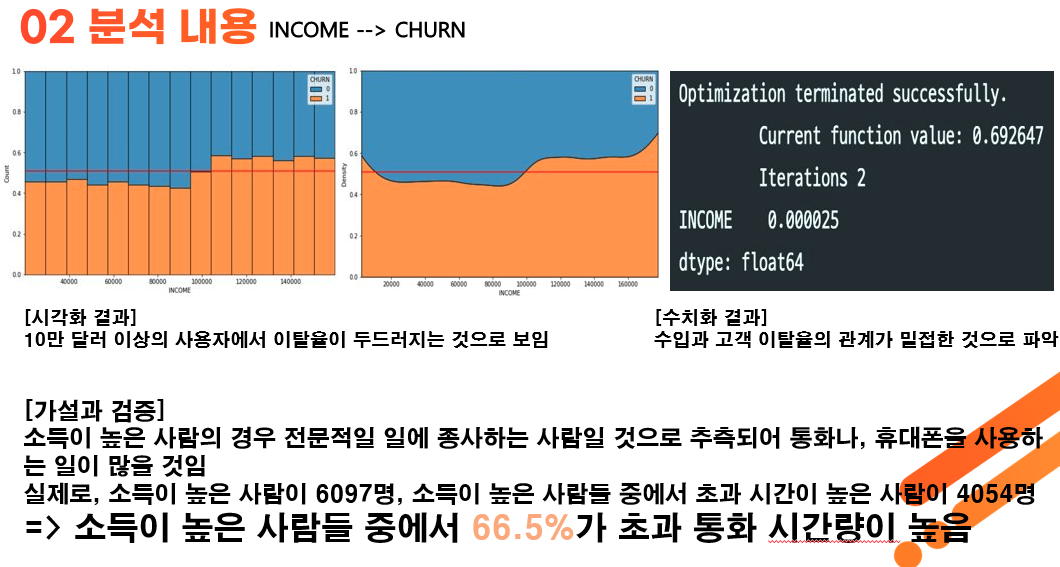

## 해결 방안
* 1. 프리미엄 프로모션 진행
    * 평균 수입이 높은 사람들을 대상으로 혜택을 주거나 프리미엄 프로모션 진행
* 2. 장기 프로모션 진행
    * 평균 수입이 높은 사람들을 대상으로 회선 유지를 목적으로 하는 멤버쉽이나 장기 프로모션을 진행


## 문제 2 : OVERAGE, LEFTOVER
* ### 초과 통화시간, 잔여 통호시간이 고객 이탈률에 영향을 주는 것으로 파악된다

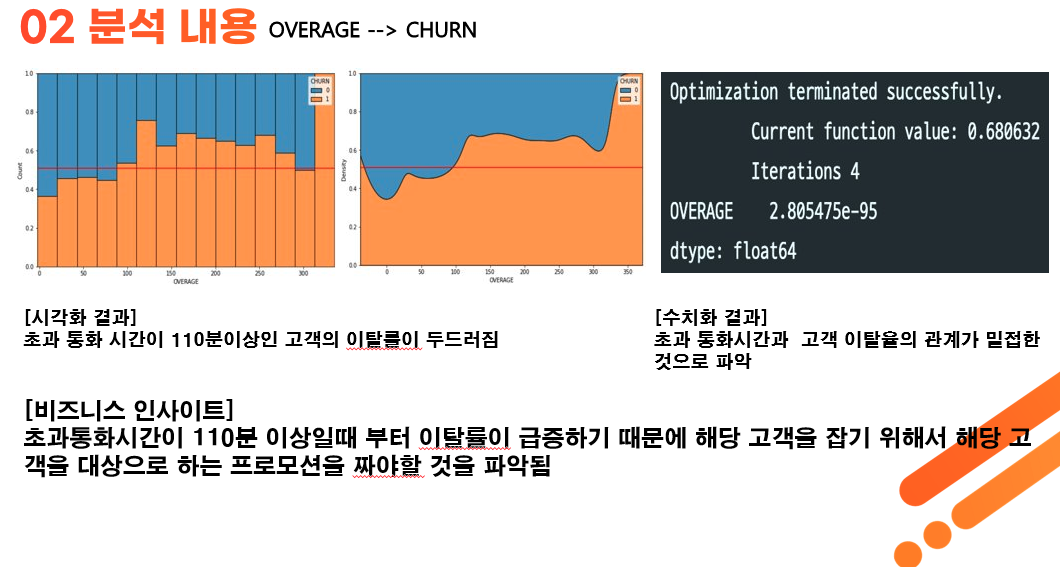

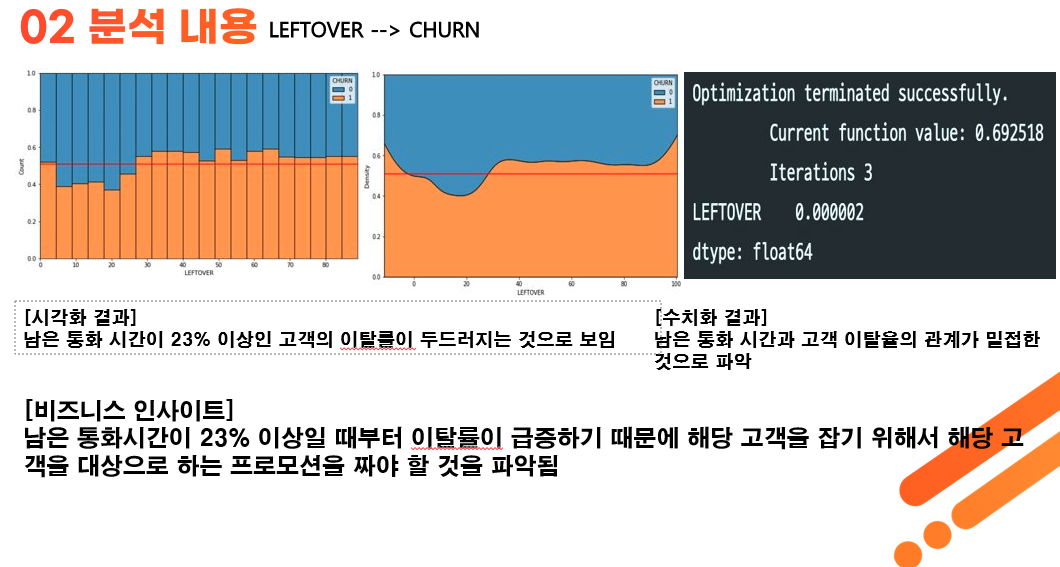

## 해결 방안
* 1. 초과 시간을 토대로 고객 범주화
    * 초과 시간이 110분 이상인 고객들의 이탈률이 높으니 해당 고객들을 대상으로 프로모션을 진행한다.
* 2. 남은 시간을 토대로 고객 범주화
    * 남은 시간이 25%이상인 고객들이 이탈률이 높으니 해당 고객들을 대상으로 프로모션을 진행한다.


## 느낀점

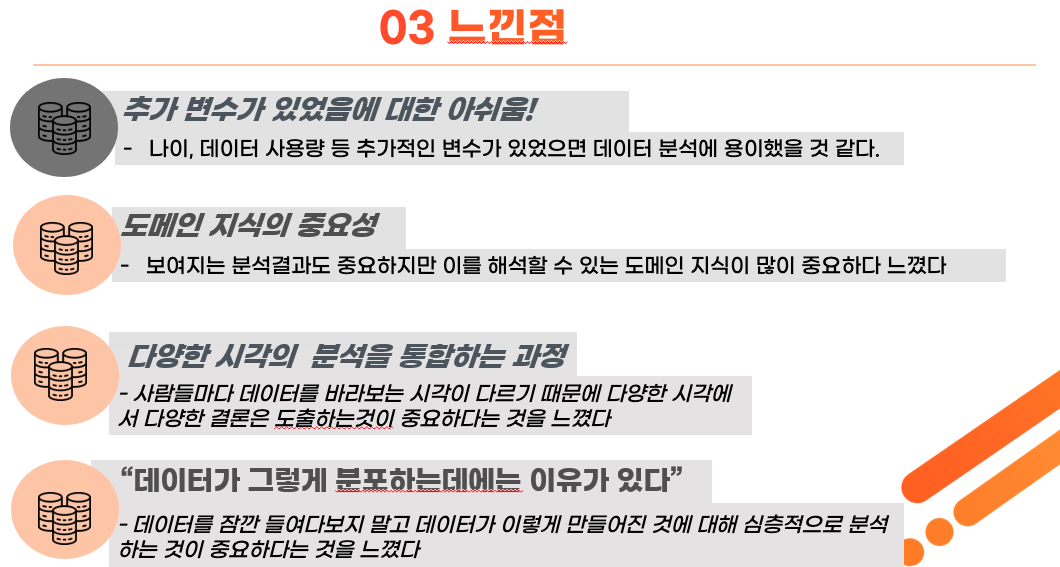